In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


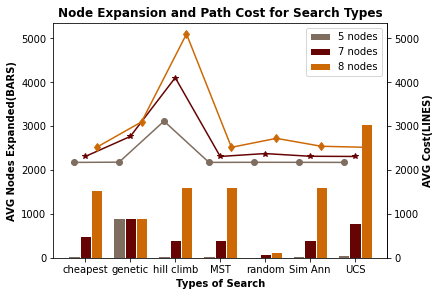

In [10]:
######PART 1#########
#graph code shell from: https://python-graph-gallery.com/11-grouped-barplot/
fields = ['Size', 'Search','Min Cost', 'Avg Cost', 'Max Cost', 'Min Nodes Expanded', 'Avg Nodes Expanded', 'Max Nodes Expanded',
              'Min Real Time', 'Avg Real Time','Max Real Time','Min CPU Time','Avg CPU Time','Max CPU Time']
df=pd.read_csv('/content/drive/My Drive/Sandbox_1.json')
df.columns=fields

data = df.groupby(['Size','Search']).mean()['Avg Nodes Expanded'].unstack()

barWidth = 0.25
fig, ax = plt.subplots(constrained_layout=True)

bars1 = data.values[0]
bars2 = data.values[1]
bars3 = data.values[2]

data2 = df.groupby(['Size','Search']).mean()['Avg Cost'].unstack()
line1=data2.values[0]
line2=data2.values[1]
#print(data2)
line3=data2.values[2]

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graphs
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='5 nodes')
ax.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='7 nodes')
ax.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='8 nodes')

#add second Y axis and plot line graphs 
secaxy = ax.secondary_yaxis('right')
secaxy.set_ylabel('AVG Cost(LINES)', fontweight='bold')
ax.plot(r1,line1,color='#7f6d5f',marker='o')
ax.plot(r2,line2,color='#660303',marker="*")
ax.plot(r3,line3, color='#cc6906',marker="d")

#sets labels 
ax.set_xlabel('Types of Search', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(bars1))])
ax.set_xticklabels(['cheapest','genetic', 'hill climb', 'MST', 'random', 'Sim Ann','UCS'])
ax.set_ylabel('AVG Nodes Expanded(BARS)', fontweight='bold')
ax.set_title('Node Expansion and Path Cost for Search Types', fontweight='bold')

plt.legend()
plt.show()

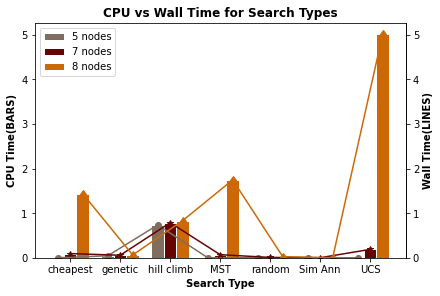

In [11]:
data = df.groupby(['Size','Search']).mean()['Avg CPU Time'].unstack()
barWidth = 0.25
fig, ax = plt.subplots(constrained_layout=True)

bars1 = data.values[0]
bars2 = data.values[1]
bars3 = data.values[2]
 
data2 = df.groupby(['Size','Search']).mean()['Avg Real Time'].unstack()
line1=data2.values[0]
line2=data2.values[1]
line3=data2.values[2]

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graph
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='5 nodes')
plt.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='7 nodes')
plt.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='8 nodes')
 
#second Y axis and plots line graphs
secaxy = ax.secondary_yaxis('right')
secaxy.set_ylabel('Wall Time(LINES)', fontweight='bold')
ax.plot(r1,line1,color='#7f6d5f',marker='o')
ax.plot(r2,line2,color='#660303',marker="*")
ax.plot(r3,line3, color='#cc6906',marker="d")

# sets labels
plt.xlabel('Search Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['cheapest','genetic', 'hill climb', 'MST', 'random', 'Sim Ann','UCS'])
plt.ylabel('CPU Time(BARS)', fontweight='bold')
ax.set_title('CPU vs Wall Time for Search Types', fontweight='bold')

plt.legend()
plt.show()

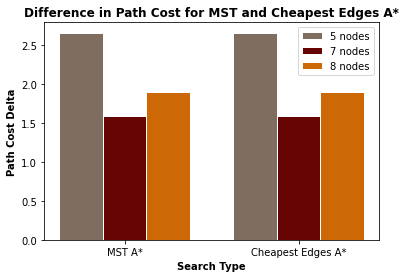

In [12]:
######PART 2#########

data = df.groupby(['Size','Search']).mean()['Max Cost'].unstack()
data2 = df.groupby(['Size','Search']).mean()['Min Cost'].unstack()
data3=data.div(data2, axis='columns')
barWidth = 0.25
#path cost delta is bar heights
#only need MST and cheapest_edges A*
bars1 = data3.values[0]
bars1=[bars1[0],bars1[3]]
bars2 = data3.values[1]
bars2=[bars2[0],bars2[3]]
bars3 = data3.values[2]
bars3=[bars3[0],bars3[3]]

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graph
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='5 nodes')
plt.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='7 nodes')
plt.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='8 nodes')
 
#add labels
plt.xlabel('Search Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MST A*', 'Cheapest Edges A*'])
plt.ylabel('Path Cost Delta', fontweight='bold')
plt.title('Difference in Path Cost for MST and Cheapest Edges A*', fontweight='bold')

plt.legend()
plt.show()

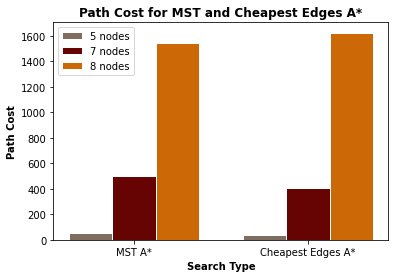

In [13]:

data = df.groupby(['Size','Search']).mean()['Avg Nodes Expanded'].unstack()
data.drop(['ga','hc','rand','sa','ucs'], axis=1,inplace=True)
barWidth = 0.25
#path cost delta is bar heights
#only need MST and cheapest_edges A*
bars1 = data.values[0]
bars2 = data.values[1]
bars3 = data.values[2]

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graph
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='5 nodes')
plt.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='7 nodes')
plt.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='8 nodes')
 
#add labels
plt.xlabel('Search Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MST A*', 'Cheapest Edges A*'])
plt.ylabel('Path Cost', fontweight='bold')
plt.title('Path Cost for MST and Cheapest Edges A*', fontweight='bold')

plt.legend()
plt.show()

Search        ga        hc        sa
Size                                
25      0.167613  1.312538  0.002922
27      0.217328  1.369015  0.003149
30      0.238454  1.462200  0.003378


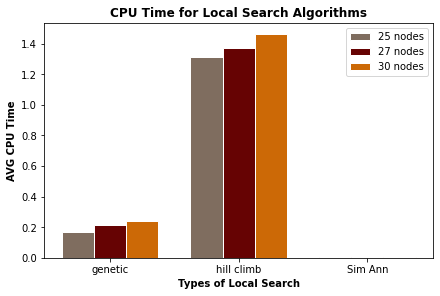

In [ ]:
####PART 3######

fields = ['Size', 'Search','Min Cost', 'Avg Cost', 'Max Cost', 'Min Nodes Expanded', 'Avg Nodes Expanded', 'Max Nodes Expanded',
              'Min Real Time', 'Avg Real Time','Max Real Time','Min CPU Time','Avg CPU Time','Max CPU Time']
df=pd.read_csv('/content/drive/My Drive/PT3.json')
df.columns=fields

data = df.groupby(['Size','Search']).mean()['Avg CPU Time'].unstack()

barWidth = 0.25
fig, ax = plt.subplots(constrained_layout=True)

bars1 = data.values[0]
bars2 = data.values[1]
bars3 = data.values[2]
print(data)

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graphs
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='25 nodes')
ax.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='27 nodes')
ax.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='30 nodes')

#sets labels 
ax.set_xlabel('Types of Local Search', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(bars1))])
ax.set_xticklabels(['genetic', 'hill climb', 'Sim Ann'])
ax.set_ylabel('AVG CPU Time', fontweight='bold')
ax.set_title('CPU Time for Local Search Algorithms', fontweight='bold')

plt.legend()
plt.show()

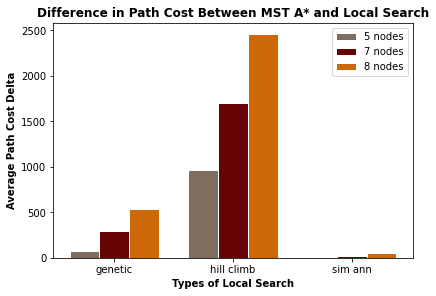

In [ ]:
df=pd.read_csv('/content/drive/My Drive/PT3_2.json')
df.columns=fields

data = df.groupby(['Size','Search']).mean()['Avg Cost'].unstack()

mst=data['mst']
data.drop(['mst'], axis=1,inplace=True)
barWidth = 0.25
fig, ax = plt.subplots(constrained_layout=True)

data=data.join(mst)
#print(data)
data[data.columns[:-1]] = data[data.columns[:-1]].sub(data.mst, axis=0)
data.drop(['mst'], axis=1,inplace=True)

bars1 = data.values[0]
bars2 = data.values[1]
bars3 = data.values[2]
#print(mst)
# data2 = df.groupby(['Size','Search']).mean()['Avg CPU Time'].unstack()
# line1=data2.values[0]
# line2=data2.values[1]
# line3=data2.values[2]

#set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
#make the bar graphs
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='5 nodes')
ax.bar(r2, bars2, color='#660303', width=barWidth, edgecolor='white', label='7 nodes')
ax.bar(r3, bars3, color='#cc6906', width=barWidth, edgecolor='white', label='8 nodes')

#sets labels 
ax.set_xlabel('Types of Local Search', fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(bars1))])
ax.set_xticklabels(['genetic', 'hill climb','sim ann'])
ax.set_ylabel('Average Path Cost Delta', fontweight='bold')
ax.set_title('Difference in Path Cost Between MST A* and Local Search', fontweight='bold')

plt.legend()
plt.show()